In [1]:
# get the data
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-02-03 10:17:03--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-02-03 10:17:03 (8.18 MB/s) - ‘names.txt’ saved [228145/228145]



In [2]:
words = open("/content/names.txt").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(words), min(len(w) for w in words), max(len(w) for w in words)

(32033, 2, 15)

In [4]:
b = {}

for w in words:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
len(set("".join(w for w in words)))

26

In [7]:
import torch

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32) 

In [9]:
chars = sorted(list(set("".join(w for w in words))))

s2i = {c: i+1 for i, c in enumerate(chars)}
s2i["."] = 0

i2s = {i:s for s, i in s2i.items()}

In [10]:
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s2i[ch1]
    ix2 = s2i[ch2] 
    N[ix1, ix2] += 1

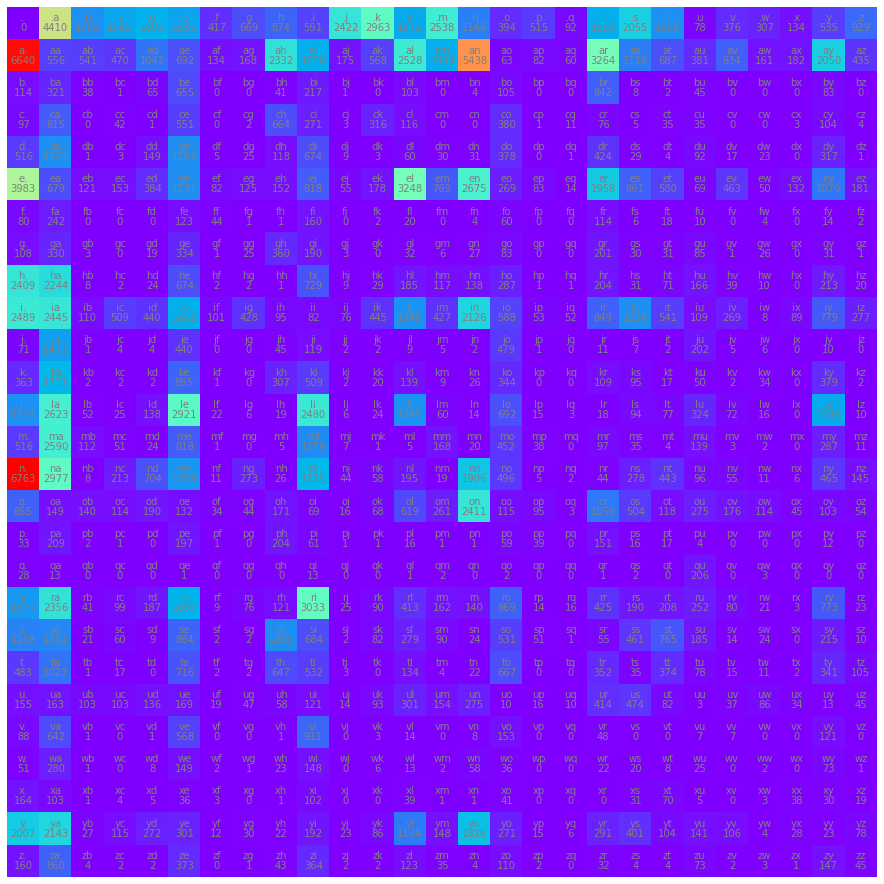

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="rainbow")
for i in range(27):
  for j in range(27):
    chstr = i2s[i] + i2s[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [12]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [13]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

In [15]:
i2s[ix]

'm'

In [16]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [17]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [18]:
p.shape

torch.Size([3])

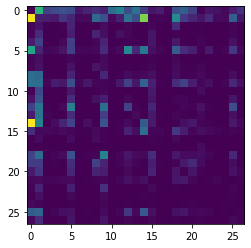

In [19]:
plt.imshow(N)

In [20]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

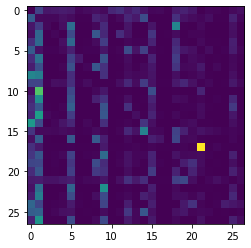

In [21]:
plt.imshow(P)

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out=[]
  ix=0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(i2s[ix])
    if ix==0:
      break

  print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [23]:
log_likelihood = 0.0
n = 0

for w in ["edaeda"]:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s2i[ch1]
    ix2 = s2i[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f"{ch1}{ch2}: {prob:.4f} | {logprob:.4f} | {log_likelihood:.4f}")

.e: 0.0478 | -3.0410 | -3.0410
ed: 0.0188 | -3.9725 | -7.0135
da: 0.2361 | -1.4435 | -8.4570
ae: 0.0204 | -3.8905 | -12.3475
ed: 0.0188 | -3.9725 | -16.3200
da: 0.2361 | -1.4435 | -17.7635
a.: 0.1958 | -1.6305 | -19.3940


In [24]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s2i[ch1] 
    ix2 = s2i[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n=}")

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


In [25]:
# create trainin set for bigrams
xs, ys = [], []

for w in words[:1]:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s2i[ch1]
    ix2 = s2i[ch2]
    #print(ch1, ch2)
    xs.append(ix1); ys.append(ix2);

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [26]:
xs.dtype, ys.dtype

(torch.int64, torch.int64)

In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
xenc.shape

torch.Size([5, 27])

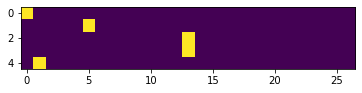

In [31]:
plt.imshow(xenc)

In [32]:
xenc.dtype

torch.float32

In [33]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 7.2627e-01, -2.3915e-01, -6.6452e-01,  1.7962e+00, -1.5411e+00,
         -8.5452e-01, -8.0961e-01,  1.9887e+00, -8.4242e-01,  1.5125e+00,
         -1.2673e-01, -7.5518e-01, -1.7570e+00,  7.1724e-01, -5.1531e-01,
         -3.6414e-01,  1.2260e+00,  3.2623e-01,  5.0055e-01,  1.0023e+00,
          1.4731e-01, -3.1861e-04,  7.3106e-02,  6.4142e-01,  4.3499e-01,
         -8.4583e-01,  5.6777e-01],
        [ 1.3249e+00,  5.9771e-01,  1.0134e+00, -2.3949e+00,  1.8393e-01,
         -6.9945e-02,  1.6883e+00, -3.6185e-01,  7.5944e-01, -1.3386e+00,
         -3.6380e-01, -4.5371e-01,  1.2917e+00,  8.7355e-01,  1.1073e+00,
         -1.3873e-01,  8.1984e-01,  1.0014e+00, -8.0638e-02, -3.5576e-02,
         -5.5884e-01, -3.3413e-01, -1.7287e-01, -1.6651e+00,  6.2773e-01,
         -4.6518e-01,  1.7117e+00],
        [ 3.6792e-02,  1.2435e+00,  4.7685e-02, -1.2417e+00, -8.7753e-01,
         -1.4372e+00, -1.7812e-01,  2.9895e+00, -1.2251e-01, -1.5156e+00,
         -7.1957e-01, -7.1700e-01, -2.76

In [34]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(axis=1, keepdims=True)
probs

tensor([[0.0453, 0.0172, 0.0113, 0.1320, 0.0047, 0.0093, 0.0097, 0.1600, 0.0094,
         0.0994, 0.0193, 0.0103, 0.0038, 0.0449, 0.0131, 0.0152, 0.0746, 0.0303,
         0.0361, 0.0597, 0.0254, 0.0219, 0.0236, 0.0416, 0.0338, 0.0094, 0.0386],
        [0.0791, 0.0382, 0.0579, 0.0019, 0.0253, 0.0196, 0.1137, 0.0146, 0.0449,
         0.0055, 0.0146, 0.0134, 0.0765, 0.0504, 0.0636, 0.0183, 0.0477, 0.0572,
         0.0194, 0.0203, 0.0120, 0.0151, 0.0177, 0.0040, 0.0394, 0.0132, 0.1164],
        [0.0218, 0.0730, 0.0221, 0.0061, 0.0088, 0.0050, 0.0176, 0.4186, 0.0186,
         0.0046, 0.0103, 0.0103, 0.0160, 0.0174, 0.0070, 0.0242, 0.0398, 0.0197,
         0.0133, 0.0182, 0.0870, 0.0130, 0.0380, 0.0035, 0.0092, 0.0528, 0.0241],
        [0.0218, 0.0730, 0.0221, 0.0061, 0.0088, 0.0050, 0.0176, 0.4186, 0.0186,
         0.0046, 0.0103, 0.0103, 0.0160, 0.0174, 0.0070, 0.0242, 0.0398, 0.0197,
         0.0133, 0.0182, 0.0870, 0.0130, 0.0380, 0.0035, 0.0092, 0.0528, 0.0241],
        [0.0110, 0.0644,

In [35]:
probs[0]

tensor([0.0453, 0.0172, 0.0113, 0.1320, 0.0047, 0.0093, 0.0097, 0.1600, 0.0094,
        0.0994, 0.0193, 0.0103, 0.0038, 0.0449, 0.0131, 0.0152, 0.0746, 0.0303,
        0.0361, 0.0597, 0.0254, 0.0219, 0.0236, 0.0416, 0.0338, 0.0094, 0.0386])

In [36]:
probs[0].sum()

tensor(1.0000)

In [37]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram
  x = xs[i].item()
  y = ys[i].item()
  print("------")
  print(f"bigram example {i+1}: {i2s[x]}{i2s[y]} (indexes {x},{y})")
  print("input to the nn: ", x)
  print("output probabilities: ", probs[i])
  print("label(actual next char): ", y)
  p = probs[i, y]
  print("prob: ", p.item())
  logp = torch.log(p)
  print("log likelihood ", logp)
  nll = -logp
  print("neg ll ", nll)

------
bigram example 1: .e (indexes 0,5)
input to the nn:  0
output probabilities:  tensor([0.0453, 0.0172, 0.0113, 0.1320, 0.0047, 0.0093, 0.0097, 0.1600, 0.0094,
        0.0994, 0.0193, 0.0103, 0.0038, 0.0449, 0.0131, 0.0152, 0.0746, 0.0303,
        0.0361, 0.0597, 0.0254, 0.0219, 0.0236, 0.0416, 0.0338, 0.0094, 0.0386])
label(actual next char):  5
prob:  0.009318850003182888
log likelihood  tensor(-4.6757)
neg ll  tensor(4.6757)
------
bigram example 2: em (indexes 5,13)
input to the nn:  5
output probabilities:  tensor([0.0791, 0.0382, 0.0579, 0.0019, 0.0253, 0.0196, 0.1137, 0.0146, 0.0449,
        0.0055, 0.0146, 0.0134, 0.0765, 0.0504, 0.0636, 0.0183, 0.0477, 0.0572,
        0.0194, 0.0203, 0.0120, 0.0151, 0.0177, 0.0040, 0.0394, 0.0132, 0.1164])
label(actual next char):  13
prob:  0.05036010965704918
log likelihood  tensor(-2.9886)
neg ll  tensor(2.9886)
------
bigram example 3: mm (indexes 13,13)
input to the nn:  13
output probabilities:  tensor([0.0218, 0.0730, 0.0221, 0.006

In [38]:
# random initialization
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [39]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [40]:
loss

tensor(4.3721, grad_fn=<NegBackward0>)

In [41]:
# backward pass
W.grad = None # reset grad
loss.backward()

In [42]:
W.data -= 50 * W.grad

In [43]:
##########################

xs, ys = [], []
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s2i[ch1] 
    ix2 = s2i[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("num examples:", num)

num examples: 228146


In [44]:
# initialize the net
g = torch.Generator().manual_seed(42)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [45]:
# gradient descent
for k in range(5):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  # softmax
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  # cross entropy loss + l2 regularization 
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -50 * W.grad

3.706477165222168
3.373866081237793
3.1580393314361572
3.015209197998047
2.9186456203460693


In [46]:
# sample from the neural net
g = torch.Generator().manual_seed(42)

for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    out.append(i2s[ix])
    if ix == 0:
      break
  print("".join(out))

a.
a.
liyz.
a.
ituhi.


## Tri-gram

In [47]:
xs1, xs2, ys = [], [], []
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = s2i[ch1] 
    ix2 = s2i[ch2]
    ix3 = s2i[ch3]

    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)
  
xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
xs = torch.vstack((xs1, xs2)).permute(1, 0)
ys = torch.tensor(ys)

# initialize the net
g = torch.Generator().manual_seed(42)
W = torch.randn((27*2, 27), generator=g, requires_grad=True)


# gradient descent
for k in range(150):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).view(len(xs), -1).float()
  #print(xenc.shape, W.shape)
  logits = xenc @ W
  # softmax
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  # cross entropy loss + l2 regularization 
  loss = -probs[torch.arange(len(xs)), ys].log().mean()
  print(f'Epoch {k} Loss {loss}')

  # backward pass
  W.grad = None
  loss.backward()

  # update
  W.data += -100 * W.grad

Epoch 0 Loss 4.2108659744262695
Epoch 1 Loss 3.24078369140625
Epoch 2 Loss 3.2603557109832764
Epoch 3 Loss 2.808056354522705
Epoch 4 Loss 2.7911832332611084
Epoch 5 Loss 2.630260944366455
Epoch 6 Loss 2.819789409637451
Epoch 7 Loss 2.8253841400146484
Epoch 8 Loss 2.6527950763702393
Epoch 9 Loss 2.5666706562042236
Epoch 10 Loss 2.798356771469116
Epoch 11 Loss 2.7651443481445312
Epoch 12 Loss 2.5662684440612793
Epoch 13 Loss 2.5332696437835693
Epoch 14 Loss 2.7285046577453613
Epoch 15 Loss 2.5486767292022705
Epoch 16 Loss 2.5381932258605957
Epoch 17 Loss 2.7305307388305664
Epoch 18 Loss 2.63978910446167
Epoch 19 Loss 2.4350292682647705
Epoch 20 Loss 2.5236918926239014
Epoch 21 Loss 2.6794991493225098
Epoch 22 Loss 2.7200891971588135
Epoch 23 Loss 2.560387134552002
Epoch 24 Loss 2.4793100357055664
Epoch 25 Loss 2.6954994201660156
Epoch 26 Loss 2.6866729259490967
Epoch 27 Loss 2.46026611328125
Epoch 28 Loss 2.517101526260376
Epoch 29 Loss 2.7491934299468994
Epoch 30 Loss 2.713897943496704


In [48]:
# sample from the neural net
g = torch.Generator().manual_seed(42)

for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=54).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    out.append(i2s[ix])
    if ix == 0:
      break
  print("".join(out))

abaaliyu.
adistfo.
anfaode.
awbecegbfolw.
aivaidyrg.
